<a href="https://colab.research.google.com/github/jtoyhh/Stock_Price_Prediction/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install --upgrade pandas-datareader

In [18]:
#Description : This program attempts to optimize a users portfolio using the Efficient Frontier

In [19]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
#Get the stock symbols/ ticker in the portfolio
#FAANG
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [21]:
#Assign weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [22]:
#Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [23]:
# Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-11-01'

In [24]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [25]:
#Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.985449,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.771055,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.303902,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.207996,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.251617,13.880000,365.280823
...,...,...,...,...,...
2021-10-26,315.809998,3376.070068,149.320007,668.520020,2793.439941
2021-10-27,312.220001,3392.489990,148.850006,662.919983,2928.550049
2021-10-28,316.920013,3446.570068,152.570007,674.049988,2922.580078


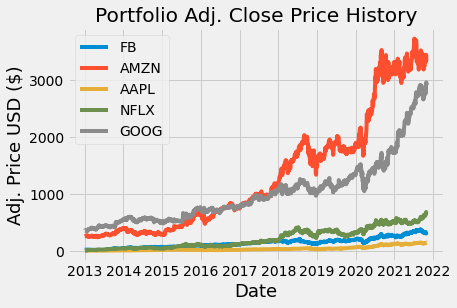

In [26]:
#Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)


plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()


In [27]:
#Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-10-26,-0.039186,0.016775,0.004575,-0.004675,0.006478
2021-10-27,-0.011368,0.004864,-0.003148,-0.008377,0.048367
2021-10-28,0.015054,0.015941,0.024992,0.016789,-0.002039


In [28]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115695,0.053264,0.044165,0.055008,0.049501
AMZN,0.053264,0.090590,0.039446,0.060850,0.046275
AAPL,0.044165,0.039446,0.079816,0.035069,0.037992
NFLX,0.055008,0.060850,0.035069,0.201082,0.047276
GOOG,0.049501,0.046275,0.037992,0.047276,0.065265


In [29]:
#Calculate the portfolio variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05960562636263173

In [30]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.24414263528239333

In [31]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3547183207087746

In [32]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance, 2)* 100)+ '%'
percent_vols = str(round(port_volatility, 2) * 100)+ '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return : '+ percent_ret)
print('Annual volatility / risk : '+ percent_vols)
print('Annual variance : '+ percent_var)

Expected annual return : 35.0%
Annual volatility / risk : 24.0%
Annual variance : 6.0%


In [33]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.7 MB/s 
     |████████████████████████████████| 2.7 MB 10.1 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [34]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [35]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose= True)

OrderedDict([('FB', 0.09145), ('AMZN', 0.20773), ('AAPL', 0.25837), ('NFLX', 0.35497), ('GOOG', 0.08748)])
Expected annual return: 39.5%
Annual volatility: 26.6%
Sharpe Ratio: 1.41


(0.39538438017440314, 0.2655027518910912, 1.413862483536085)

In [36]:
0.08651 + 0.20968 + 0.25985 + 0.34455 + 0.09941

1.0

In [37]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 15000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'FB': 5, 'AMZN': 1, 'AAPL': 27, 'NFLX': 8}
Funds remaining: $521.96
